<a href="https://colab.research.google.com/github/eyaguirat10/deep-learning-fashion-mnist/blob/main/Eya_Guirat_H1_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys

## Load the dataset: Fashion MNIST

![](https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png)

In [2]:
from sklearn.preprocessing import StandardScaler
# Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (_, _) = fashion_mnist.load_data()

# Get only a subpart of the dataset
# Get only a subpart
images = images[:10000]
targets = targets [:10000]

# Reshape the dataset and convert to float
images = images.reshape(-1, 784)
images = images.astype(float)

scaler = StandardScaler()
images = scaler.fit_transform(images)

print(images.shape)
print(targets.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(10000, 784)
(10000,)


## Plot one of the data

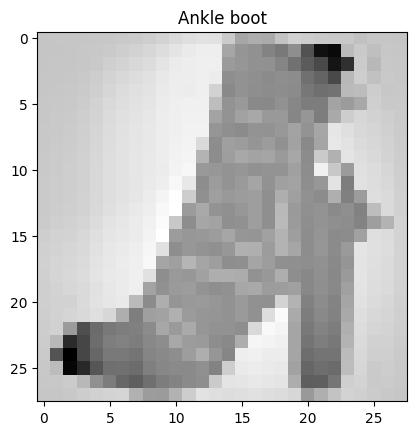

In [3]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
# Plot one image
plt.imshow(np.reshape(images[11], (28, 28)), cmap="binary")
plt.title(targets_names[targets[11]])
plt.show()

# Add the layers

In [4]:
# Flatten
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(784,)))
# Add 3 layers,
#first layer contains 256 nodes and use relu activation function
model.add(tf.keras.layers.Dense(256, activation='relu'))
#second layer contains 128 nodes and use relu activation function
model.add(tf.keras.layers.Dense(128, activation='relu'))
#last layer contains 10 nodes and use softmax activation function
model.add(tf.keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Compile the model

In [5]:
# Compile the model with the appropriate loss function and with sgd optimizer
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


## Train the model

In [6]:
#train your model. The number of itérations is 10.
history = model.fit(images, targets, epochs=10, validation_split=0.2)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5999 - loss: 1.2171 - val_accuracy: 0.7760 - val_loss: 0.6253
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8030 - loss: 0.5580 - val_accuracy: 0.8110 - val_loss: 0.5326
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8412 - loss: 0.4478 - val_accuracy: 0.8160 - val_loss: 0.4958
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8574 - loss: 0.4013 - val_accuracy: 0.8335 - val_loss: 0.4576
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8817 - loss: 0.3413 - val_accuracy: 0.8360 - val_loss: 0.4393
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8862 - loss: 0.3404 - val_accuracy: 0.8380 - val_loss: 0.4249
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8910 - loss: 0.3127 - val_accuracy: 0.8460 - val_loss: 0.4143
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8945 - loss: 0.2997 - val_accuracy: 0.

## Model Summary

In [7]:
#display the summary of your model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,148 (918.55 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

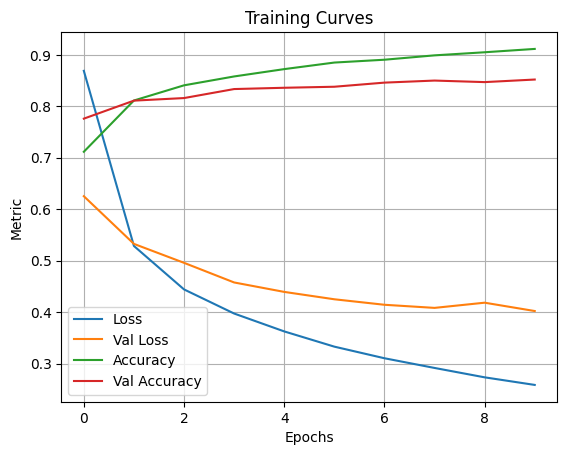

In [8]:
#display loss and accuracy curves
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Training Curves")
plt.xlabel("Epochs")
plt.ylabel("Metric")
plt.grid()
plt.show()

À partir de l’affichage des courbes d’apprentissage, on observe les éléments suivants :

* La loss d'entraînement (bleue) diminue fortement au fil des époques, ce qui montre que le modèle apprend bien à prédire les données qu’on lui donne.

* La loss de validation (orange) diminue aussi, plus lentement, mais de façon stable. Cela signifie que le modèle généralise bien sur des données qu’il n’a pas vues.

* L'accuracy d'entraînement (verte) augmente progressivement jusqu’à dépasser 92 %, ce qui est excellent.

* L'accuracy de validation (rouge) augmente également jusqu’à ~87 %, avec une courbe qui reste proche de celle d’entraînement.


In [9]:
model.save("model.h5")